## Hand Written Classification

In [23]:
# import deep learning libraries
import tensorflow as tf
from tensorflow import keras

#import data visualization library
import matplotlib.pyplot as plt

%matplotlib inline

#import numerical calculational library
import numpy as np


In [24]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [25]:
len(X_train)

60000

In [26]:
len(X_test)

10000

In [27]:
X_train[0].shape

(28, 28)

In [28]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

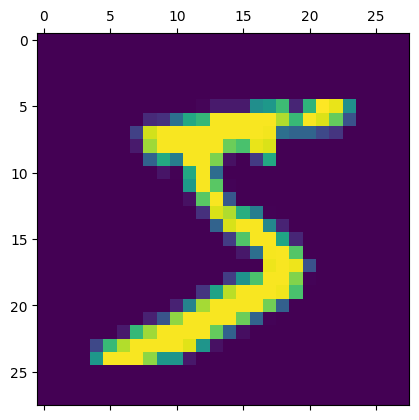

In [29]:
plt.matshow(X_train[0])

In [30]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
X_train =  X_train / 255
X_test =  X_test / 255

## Flattening the 2 Dimensional layer to a single dimension layer

In [33]:
X_train_flattened = X_train.reshape(len(X_train), 28 *28)
X_test_flattened = X_test.reshape(len(X_test), 28 *28)

X_train_flattened.shape

(60000, 784)

In [34]:
X_test_flattened.shape

(10000, 784)

In [35]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Creating the Neural network!

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10 ,input_shape=(784,), activation='sigmoid')
])



In [37]:
model.compile(
    optimizer = 'adam' ,
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [38]:
model.fit(X_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - accuracy: 0.8185 - loss: 0.7142
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9141 - loss: 0.3068
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9210 - loss: 0.2845
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9254 - loss: 0.2695
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9254 - loss: 0.2627


In [39]:
model.evaluate(X_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.9150 - loss: 0.3052


[0.26812925934791565, 0.9258000254631042]

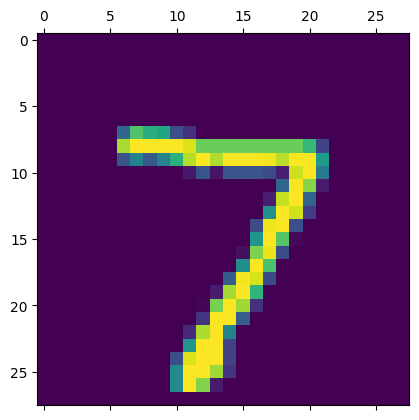

In [40]:
plt.matshow(X_test[0])

In [42]:
 y_predicted = model.predict(X_test_flattened)
 y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step


array([1.56054245e-02, 4.99508531e-07, 9.78170857e-02, 9.55848992e-01,
       2.65748054e-03, 1.19993120e-01, 1.52957352e-06, 9.99746680e-01,
       7.66299367e-02, 7.21524358e-01], dtype=float32)

In [43]:
np.argmax( y_predicted[0])

7

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

### Confusion Matrix

In [46]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 947,    0,    3,    2,    0,   10,   10,    4,    3,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  946,   15,    7,    4,   11,    8,   24,    5],
       [   0,    0,   24,  929,    1,   20,    2,    8,   16,   10],
       [   1,    2,    3,    1,  910,    0,   11,    3,    7,   44],
       [   7,    3,    4,   33,    9,  783,   12,    6,   26,    9],
       [   7,    3,    8,    1,    8,   14,  912,    2,    3,    0],
       [   1,   11,   27,    5,   10,    1,    0,  928,    1,   44],
       [   4,   11,   11,   22,    9,   35,    9,    9,  849,   15],
       [   6,    7,    2,   11,   17,    5,    0,   15,    8,  938]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

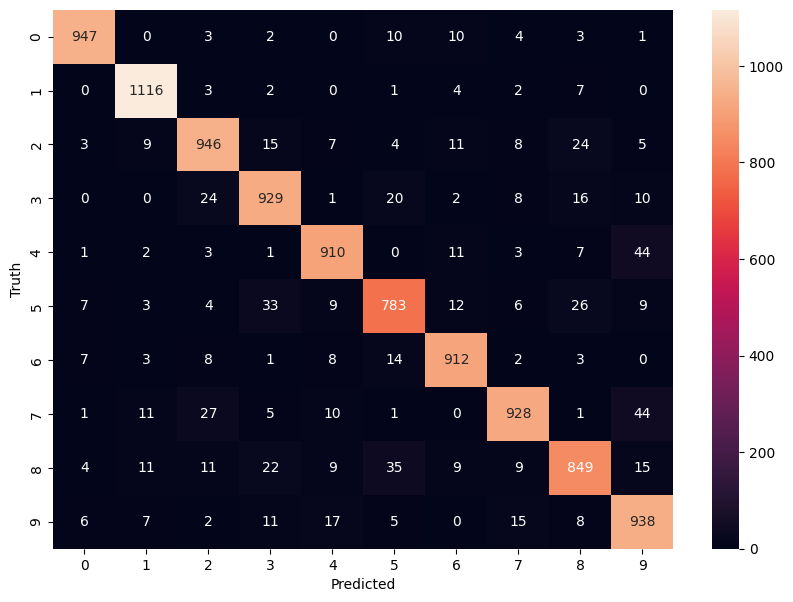

In [47]:
import seaborn as sns
plt.figure(figsize = (10 , 7))
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Adding the Hidden Layer into the neural net!

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100 ,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
])


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(
    optimizer = 'adam' ,
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
model.fit(X_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.8716 - loss: 0.4572
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9627 - loss: 0.1267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.9748 - loss: 0.0855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9817 - loss: 0.0634
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.9860 - loss: 0.0479


In [57]:
model.evaluate(X_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.9694 - loss: 0.1023


[0.08722981810569763, 0.9746999740600586]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


Text(95.72222222222221, 0.5, 'Truth')

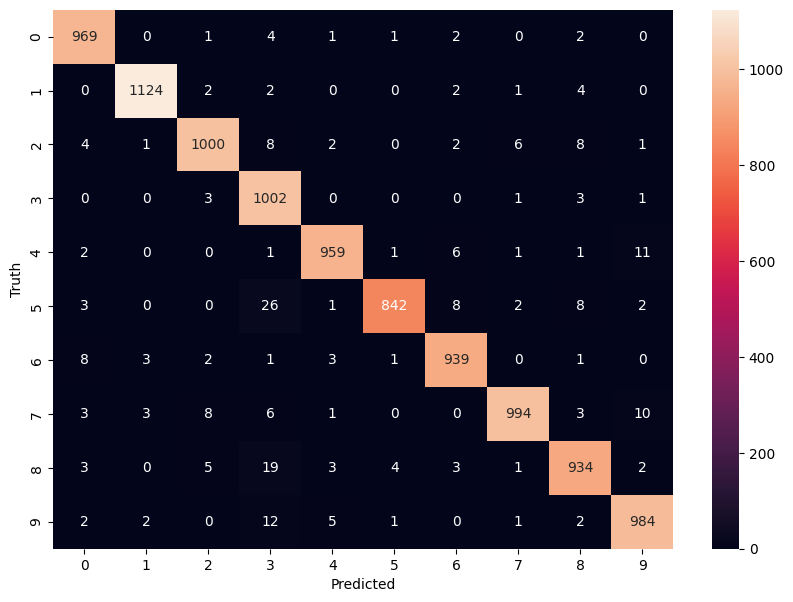

In [58]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)

plt.figure(figsize = (10 , 7))
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")